In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp



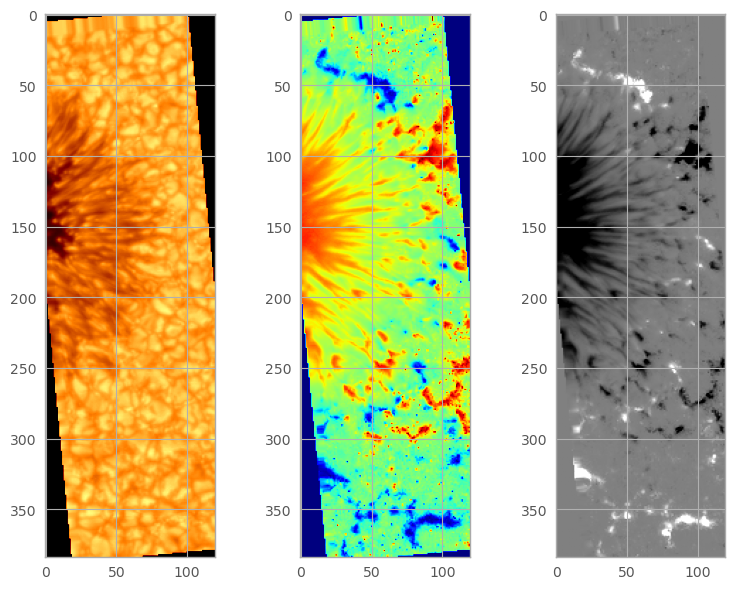

In [3]:
dc_rot = ndimage.rotate(data_conti, 5.5, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 5.5, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 5.5, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,50], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,50], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,50], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

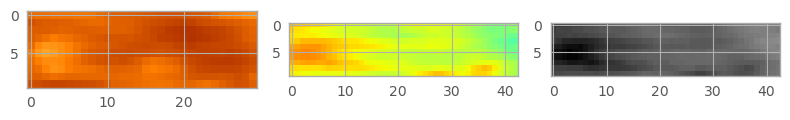

In [83]:
a = 146
b = 156
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,37:67,50], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,32:75,50], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,32:75,50], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

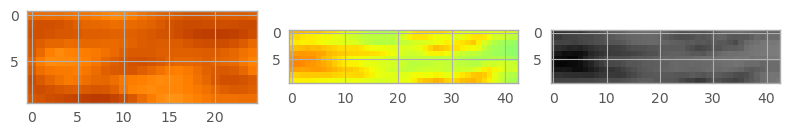

In [85]:
a = 146
b = 156
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,35:60,51], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,32:75,51], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,32:75,51], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

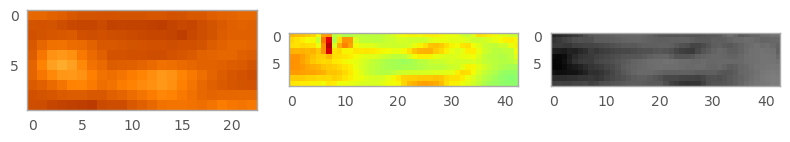

In [86]:
a = 146
b = 156
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,32:55,52], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,32:75,52], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,32:75,52], cmap='gray', vmin=-1250, vmax=1250)
for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

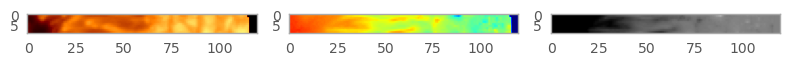

In [15]:
a = 146
b = 156
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,:,53], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,:,53], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,:,53], cmap='gray', vmin=-1250, vmax=1250)
for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

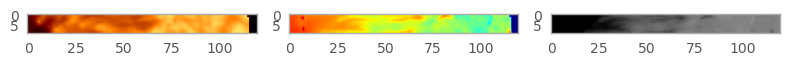

In [16]:
a = 146
b = 156
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,:,54], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,:,54], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,:,54], cmap='gray', vmin=-1250, vmax=1250)
for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

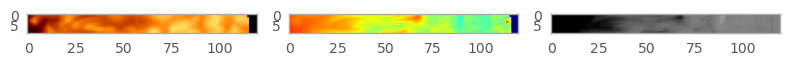

In [17]:
a = 146
b = 156
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,:,55], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,:,55], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,:,55], cmap='gray', vmin=-1250, vmax=1250)
for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

In [77]:
#continuum intensity - conti head starts at 37, vertical at 4
dc_rot[146:156,:,52][6][37:67]

array([12156.86594715, 11548.26314051, 11057.04548576, 10912.66932146,
       11136.53714481, 11402.20729725, 11689.01458357, 11985.54967614,
       12337.84005845, 12110.08263666, 11685.22371055, 11280.03004088,
       10959.73557751, 10609.90399798, 10358.45236583, 10139.93382751,
       10002.30446638,  9849.87356178,  9727.81117601,  9665.05100103,
        9726.10848908,  9748.39709076, 10005.93092194, 10034.84179989,
       10104.18382561, 10295.92929385, 10537.51090558, 11059.72599239,
       11675.26424128, 12441.90690557])

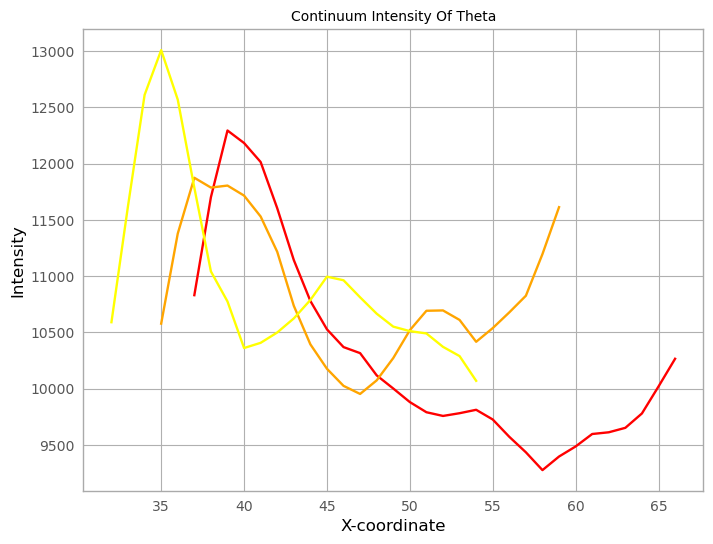

In [4]:
#vertical index [4]
dc_y0 = np.array([10830.30222058, 11701.27043804, 12294.20167224, 12182.95283841,
       12014.13741595, 11603.49718187, 11142.72583916, 10778.92638669,
       10526.70579469, 10368.7490592 , 10315.07679736, 10117.46287704,
       10000.55429352,  9880.03134076,  9789.74390398,  9756.74661262,
        9781.01231931,  9811.40680723,  9725.30859859,  9571.16687579,
        9433.61103866,  9275.1967583 ,  9395.92487016,  9485.2881373 ,
        9596.16932967,  9611.4391858 ,  9651.04608556,  9778.82140485,
       10018.53543849, 10264.91920873])
dc_x0 = range(37,67)

#vertical index [5]
dc_y1 = np.array([10577.25410154, 11377.90919532, 11874.05855709, 11786.90228517,
       11804.69691335, 11715.60818873, 11529.60605433, 11216.02642146,
       10735.99687008, 10393.22247514, 10176.01503743, 10024.13668709,
        9952.26792484, 10072.97020686, 10271.35825449, 10518.90939956,
       10691.67437104, 10694.67701907, 10610.26013365, 10415.96816764,
       10537.58362728, 10677.48653832, 10825.33231128, 11195.61278155,
       11612.69128335])
dc_x1 = range(35,60)

#vertical index [5]
dc_y2 = np.array([10589.89530112, 11624.27781039, 12610.72625492, 13008.86445463,
       12568.70675182, 11785.3861718 , 11041.38365768, 10774.4660716 ,
       10360.59366759, 10406.64280104, 10498.49423962, 10623.66257387,
       10787.52355265, 10994.96985914, 10962.84644681, 10811.26644382,
       10665.77761717, 10550.69910171, 10510.75462116, 10490.18228215,
       10371.02829013, 10288.91611969, 10069.06697005])
dc_x2 = range(32,55)


plt.title("Continuum Intensity Of Theta")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity")
plt.plot(dc_x0,dc_y0, color="red")
plt.plot(dc_x1,dc_y1, color="orange")
plt.plot(dc_x2,dc_y2, color="yellow")

plt.show()

In [78]:
#magnetic inclination - tail starts in between the fork looking shape
mi_rot[146:156,:,52][6][32:75]

array([136.29190981, 135.65531201, 134.05278603, 131.49101208,
       130.33603183, 128.8962444 , 126.49246672, 124.81703719,
       123.91060459, 122.20718603, 120.0535325 , 117.4685622 ,
       114.27588   , 110.29359904, 107.72115527, 105.27175898,
       103.53769266, 101.95076491, 100.48996599,  99.53671528,
        98.80339977, 100.12705815, 100.50511164, 100.05995048,
       101.91358554, 103.34936608, 104.66960887, 104.3702441 ,
       104.69720232, 105.72412742, 107.11495495, 108.38619139,
       112.35178735, 117.15048832, 116.2623719 , 111.87044057,
       109.00641408, 105.50705926, 102.93338766, 101.29516894,
       100.46628653,  98.9723342 ,  99.4376264 ])

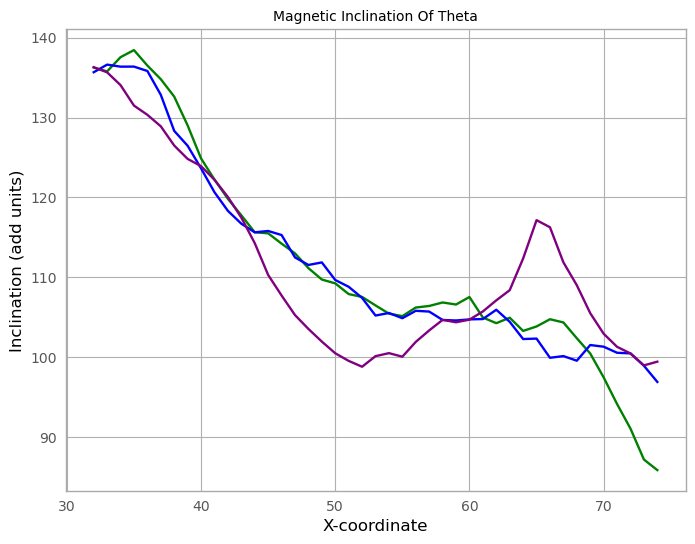

In [80]:
##**as of 05/10 these are copy pasted from Epsilon (not correctly adjusted yet)


#vertical index [5]
mi_y0 = np.array([136.26076359, 135.7698693 , 137.55200408, 138.43562679,
       136.503453  , 134.79702559, 132.61374825, 129.00637982,
       124.87511938, 122.23313964, 119.81889912, 117.76496585,
       115.63119726, 115.50474097, 114.21302909, 112.99311482,
       111.14647252, 109.71855426, 109.2383574 , 107.89971537,
       107.54017184, 106.47866151, 105.45100247, 105.13811219,
       106.21259929, 106.41127995, 106.84718837, 106.59203288,
       107.53146314, 104.96460456, 104.25540435, 104.938437  ,
       103.28594288, 103.84510927, 104.74821237, 104.34781653,
       102.36957995, 100.45999111,  97.46787017,  94.13479197,
        91.05727073,  87.18811164,  85.86404693])
mi_x0 = range(32,75)

#vertical index [5]
mi_y1 = np.array([135.66503766, 136.61911983, 136.36473624, 136.37235296,
       135.82262011, 132.83722338, 128.32341408, 126.46325399,
       123.63435311, 120.64738029, 118.31739596, 116.70857304,
       115.62931388, 115.79704985, 115.28979773, 112.49090075,
       111.54207787, 111.86117928, 109.66011666, 108.81173473,
       107.41865338, 105.21351224, 105.53131758, 104.87571167,
       105.80502985, 105.70813935, 104.65795771, 104.5923432 ,
       104.7294589 , 104.77261231, 105.93619075, 104.42625778,
       102.27139595, 102.32550419,  99.9249187 , 100.13669404,
        99.55779282, 101.52138322, 101.31102926, 100.55339018,
       100.47154943,  98.92664411,  96.90099688])
mi_x1 = range(32,75)

#vertical index [6] --- tried vertical[5] first but 6 looks cleaner
mi_y2 = np.array([136.29190981, 135.65531201, 134.05278603, 131.49101208,
       130.33603183, 128.8962444 , 126.49246672, 124.81703719,
       123.91060459, 122.20718603, 120.0535325 , 117.4685622 ,
       114.27588   , 110.29359904, 107.72115527, 105.27175898,
       103.53769266, 101.95076491, 100.48996599,  99.53671528,
        98.80339977, 100.12705815, 100.50511164, 100.05995048,
       101.91358554, 103.34936608, 104.66960887, 104.3702441 ,
       104.69720232, 105.72412742, 107.11495495, 108.38619139,
       112.35178735, 117.15048832, 116.2623719 , 111.87044057,
       109.00641408, 105.50705926, 102.93338766, 101.29516894,
       100.46628653,  98.9723342 ,  99.4376264 ])
mi_x2 = range(32,75)


#vertical index [5] - FROM EPSILON***
#mi_y3 = np.array([119.14689188, 118.29816508, 117.22296576, 116.71187611,
       #117.02160779, 116.86452767, 117.56237759, 117.39764581,
       #117.29722111, 117.83205595, 117.04586518, 116.91051429,
       #116.92873191, 118.00454868, 114.80412309, 114.58270999,
       #113.57670031, 112.66666475, 113.39828876, 112.8217511 ,
       #111.54356079, 113.23656908, 114.28132388, 115.54593513,
       #116.9943081 ])
#mi_x3 = range(45,70)

plt.title("Magnetic Inclination Of Theta")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(mi_x0,mi_y0, color="green")
plt.plot(mi_x1,mi_y1, color="blue")
plt.plot(mi_x2,mi_y2, color="purple")
#plt.plot(mi_x3,mi_y3, color="pink")

plt.show()

In [89]:
#Bz plots
bz_rot[146:156,:,52][5][32:75]

array([-1196.85888193, -1178.74420277, -1089.88594332,  -937.01261604,
        -774.24618765,  -694.3043468 ,  -667.82612982,  -678.35778101,
        -576.18010552,  -542.95454532,  -508.68892564,  -468.76503712,
        -423.44319252,  -371.04155259,  -333.42103028,  -282.67594072,
        -245.02212186,  -220.71523404,  -185.34271208,  -174.72834205,
        -168.41725546,  -130.5711108 ,  -150.65318193,  -168.61832682,
        -201.19984241,  -201.83622504,  -227.76687935,  -230.27430854,
        -201.42243637,  -228.276614  ,  -237.55778377,  -211.36526679,
        -212.94035846,  -218.2747552 ,  -232.85685769,  -206.09357089,
        -166.65532907,  -151.30893135,  -139.46508143,  -113.06719366,
        -107.79363195,  -111.14674107,  -137.63270391])

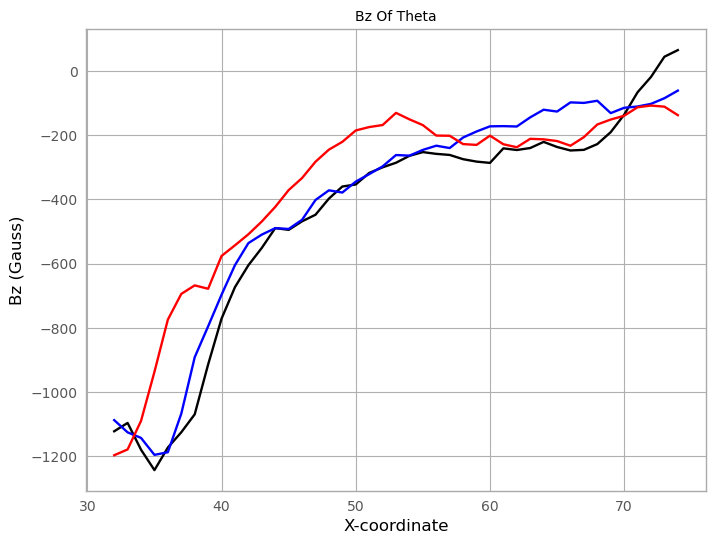

In [92]:
#vertical index [5]
bz_y0 = np.array([-1122.19973549, -1096.22220068, -1179.64680523, -1243.1652452 ,
       -1172.77368447, -1125.30353825, -1069.367016  ,  -914.09193533,
        -771.3339169 ,  -673.18329821,  -605.07622343,  -550.99945579,
        -489.37658127,  -494.92445193,  -468.25759865,  -447.81431254,
        -397.46949625,  -359.93374469,  -353.52021194,  -317.72323853,
        -300.13283585,  -285.83956   ,  -264.35782219,  -252.70430793,
        -258.20876871,  -261.56285112,  -274.78601176,  -282.31261719,
        -286.33458877,  -241.03662929,  -246.17550255,  -240.02181129,
        -220.96004689,  -236.73045497,  -247.6607869 ,  -245.67690587,
        -227.73809848,  -190.51422311,  -136.29639689,   -66.32608482,
         -18.65083935,    44.32944471,    64.94425738])
bz_x0 = range(32,75)

#vertical index [5]
bz_y1 = np.array([-1087.47708844, -1125.50927107, -1142.92048811, -1195.72313346,
       -1187.41082197, -1067.27320013,  -891.57460523,  -795.28088615,
        -696.92323257,  -604.72604901,  -536.17382519,  -509.65880634,
        -489.62757773,  -492.12537808,  -463.54922544,  -401.89037504,
        -371.77136545,  -378.68476264,  -344.65059263,  -321.38377336,
        -297.27020452,  -261.85271977,  -263.74949337,  -245.81252252,
        -232.77092038,  -240.09980225,  -207.24792887,  -188.52516498,
        -172.46603821,  -171.83618153,  -172.96015371,  -144.46863891,
        -120.68223145,  -126.3873627 ,   -97.87352185,   -99.50247255,
         -92.82008086,  -131.28277357,  -114.67413855,  -110.69735818,
        -102.47701514,   -84.89718842,   -61.19264289])
bz_x1 = range(32,75)

#vertical index [4]
bz_y2 = np.array([-1196.85888193, -1178.74420277, -1089.88594332,  -937.01261604,
        -774.24618765,  -694.3043468 ,  -667.82612982,  -678.35778101,
        -576.18010552,  -542.95454532,  -508.68892564,  -468.76503712,
        -423.44319252,  -371.04155259,  -333.42103028,  -282.67594072,
        -245.02212186,  -220.71523404,  -185.34271208,  -174.72834205,
        -168.41725546,  -130.5711108 ,  -150.65318193,  -168.61832682,
        -201.19984241,  -201.83622504,  -227.76687935,  -230.27430854,
        -201.42243637,  -228.276614  ,  -237.55778377,  -211.36526679,
        -212.94035846,  -218.2747552 ,  -232.85685769,  -206.09357089,
        -166.65532907,  -151.30893135,  -139.46508143,  -113.06719366,
        -107.79363195,  -111.14674107,  -137.63270391])
bz_x2 = range(32,75)

#vertical index [5] FROM EPSILON
#mi_y3 = np.array([119.14689188, 118.29816508, 117.22296576, 116.71187611,
       #117.02160779, 116.86452767, 117.56237759, 117.39764581,
       #117.29722111, 117.83205595, 117.04586518, 116.91051429,
       #116.92873191, 118.00454868, 114.80412309, 114.58270999,
       #113.57670031, 112.66666475, 113.39828876, 112.8217511 ,
       #111.54356079, 113.23656908, 114.28132388, 115.54593513,
       #116.9943081 ])
#mi_x3 = range(45,70)

plt.title("Bz Of Theta")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (Gauss)")
plt.plot(bz_x0,bz_y0, color="black")
plt.plot(bz_x1,bz_y1, color="blue")
plt.plot(bz_x2,bz_y2, color="red")
#plt.plot(mi_x3,mi_y3, color="pink")

plt.show()